In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import jax.numpy as jnp
import jax
import lietorch
import haiku as hk
import jaxlie
from gecco_torch.utils.isotropic_plotting import visualize_so3_probabilities

num_samples = 1000

## Sample uniformly from jaxlie


/home/giese/Documents/gecco/gecco-torch/src/gecco_torch/utils/isotropic_plotting.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


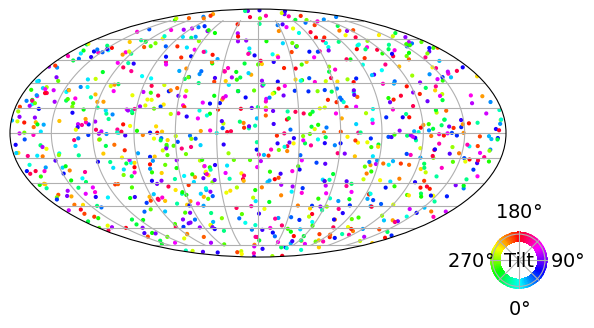

In [17]:
rng_seq = hk.PRNGSequence(42)
samples = jax.vmap(lambda k: jaxlie.SO3.sample_uniform(k).wxyz)(jax.random.split(next(rng_seq), num_samples))
visualize_so3_probabilities(
    jax.vmap(lambda x : jaxlie.SO3(x).as_matrix())(samples)
)


## Sample uniformly from lietorch

/home/giese/Documents/gecco/gecco-torch/src/gecco_torch/utils/isotropic_plotting.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'90$\degree$', None,


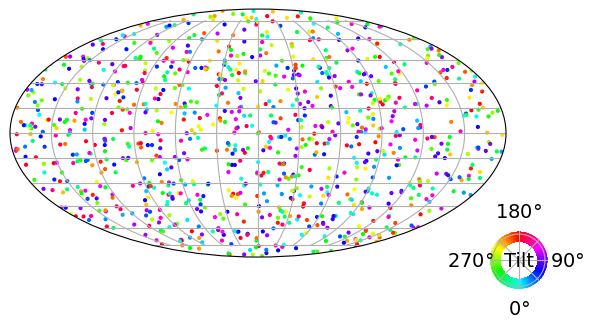

In [18]:
samples = lietorch.SO3([],from_uniform_sampled=num_samples).vec()
visualize_so3_probabilities(
        jnp.array([jaxlie.SO3(x[[3,0,1,2]].cpu().numpy()).as_matrix() for x in samples]),
        0.001);